In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math 
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [56]:
pd.options.mode.chained_assignment = None  # default='warn'

**Done by✅**

Elijah Jacob

Letta Tjakrasendjaja

Kyaw Swar Ye Myint

Michelle Tang

**Research Questions✅**

1)  What effect does income have on life expectancy for males and females? 

2)  How does life expectancy differ between the top 25% and bottom 25%? 


**Abstract✅**

In the face of growing income inequality in the United States, health disparities emerge as a consequence, significantly impacting life expectancy across income groups and genders. This research primarily addresses two questions: 1) How can socioeconomic inequality be reduced through addressing health disparities, specifically by examining the relationship between income and life expectancy? 2) How does life expectancy differ between the top 25% and bottom 25% income earners across both genders? Utilizing three comprehensive datasets from “The Association Between Income and Life Expectancy in the United States, 2001-2014”, we performed extensive data cleaning, exploratory data analysis (EDA), and predictive modeling. Our models revealed a stronger correlation between income and life expectancy for males than females. Furthermore, regression models incorporating health variables showed a more pronounced impact on life expectancy for individuals in the lowest income quartile. These findings underline the necessity of policy interventions aimed at income equality and health improvement, particularly among lower income individuals.

**Project Background ✅**

The United States, despite being an economic powerhouse, continues to rank among the top five countries with the highest levels of income inequality, as documented by the Organisation for Economic Co-operation and Development (OECD). The issue of income inequality is multifaceted, and there are a multitude of reasons behind its prevalence. This wealth gap is not only evident between different income groups, but also among racial and gender divisions. Research has consistently demonstrated a strong correlation between income level and life expectancy, a connection that is often overlooked in discussions about escalating socioeconomic disparity. Wealth disparity has far-reaching consequences that extend well beyond mere economic factors, impacting both the quality and longevity of lives.

Between 2001 and 2014, a study revealed a significant discrepancy in life expectancy between income groups. The wealthiest Americans registered an increase of about three years in longevity, while the life expectancy for the poorest Americans remained stagnant. Additionally, the income of the highest earners in the US have surged at a pace far exceeding that of the rest of the population.
This pattern is especially noticeable among the richest people, where the gains are disproportionately skewed towards the top of the bracket within this group.

This escalating trend of income inequality raises a range of serious concerns about its potential impacts, from drag on economic growth to fostering political dysfunction. Moreover, income concentration could potentially depress consumer demand in the economy, given that the wealthy generally tend to allocate a smaller proportion of their income to consumption compared to the poor. The Federation of American Scientists has asserted that while increases in life expectancy are generally considered a positive development, the widening gap in life expectancies presents a more unsettling picture. This trend could potentially pose challenges to social programs such as Social Security, which aims to redistribute wealth, but may face challenges due to increasing gaps in life expectancies. These pressing concerns highlight the urgent need for strategic policies that address income inequality and its potential impact on both economic and social well-being.


**Project Objective ✅**

The purpose of this project is to investigate the relationship between socioeconomic inequality and health disparity through prediction models that assess the impact of income on life expectancy for both males and females. Additionally, we aim to analyze how the health conditions differ between the top 25% and the bottom 25% income group and the correlation of that with life expectancy. Through this research, we hope to identify any significant disparities that exist between the different income groups and potential solutions as increasing life expectancy disparities can lead to a range of social and economical problems. 

In [57]:
# We ran this cell to read our dataset, which is put in as 3 spreadsheets.

data0 = pd.read_excel('Data_Cleaning .xlsx', sheet_name = 0)
data1 = pd.read_excel('Data_Cleaning .xlsx', sheet_name = 1)
data2 = pd.read_excel('Data_Cleaning .xlsx', sheet_name = 2)

**This is where we got our datasets from:**

http://www.equality-of-opportunity.org/data/

**Our uploaded link to Google Drive for the dataset is:**

https://docs.google.com/spreadsheets/d/1kOUz7k2co8HXsWxRQXqZ6YdVuTtH-NUY/edit#gid=1686593803

In [58]:
# This is to see the first 5 rows of Sheet0 of our dataset so that we know what
# variables to work with.

data0.head()

,gnd,pctile,count,hh_inc,hh_inc_age40,le_agg,le_raceadj,sd_le_agg,sd_le_raceadj
0,F,1,7098335,432.782043,383.325439,78.526276,78.783836,0.052538,0.062370
1,F,2,7120033,1919.115723,1681.780396,80.291382,80.462410,0.056187,0.064146
2,F,3,7131115,3718.215576,3344.087402,81.043648,81.168098,0.056927,0.065437
3,F,4,7135812,5466.638672,5051.834473,81.434181,81.530678,0.058089,0.065256
4,F,5,7140055,7089.428711,6671.778809,81.548515,81.628853,0.058225,0.064854


**Data Description ✅**

The data that we used came from the paper, The Association Between Income and Life Expectancy in the United States, 2001-2014. We utilized three datasets from the paper: National life expectancy estimates (pooling 2001-14) for men and women, by income percentile, Commuting Zone Characteristics and Commuting Zone Life Expectancy Estimates by Year, Gender, and Income Quartile.

For question 1, we used the table: National life expectancy estimates (pooling 2001-14) for men and women, by income percentile. Our target variable from this dataset is the life expectancy adjusted for race, and the features are the household income and gender (male or female). The structure of the data is tabular, with variables represented as columns and individual observations as rows. The granularity of the data is at the household income percentile level, with separate estimates reported for men and women, and for a specific age group (i.e., individuals at age 40). The reported estimates are based on pooling data from 2001 to 2014, and include both race-adjusted and unadjusted life expectancy estimates. The scope of the data is limited to the United States at a national level, and specifically to the relationship between household income and life expectancy for individuals at age 40. The estimates reported are based on data from 2001 to 2014, covering a 14-year period. The data is not longitudinal, as they do not track changes over time for the same individuals or households. Rather, the estimates in the data represent a snapshot of the relationship between household income and life expectancy at a specific point in time.

For question 2, we used two tables: Commuting Zone Characteristics and Commuting Zone Life Expectancy Estimates by Year, Gender, and Income Quartile. The structure of the data are also tabular, where columns represent variables and rows represent individual observations.the granularity is by individual state, where we examine the commuting zone characteristics (such as the fraction of people who are: current smokers, obese, have exercised in the past 30 days, as well as the average household income) and life expectancy adjusted by race, separately for each state and across four quartiles. The scope of our data covers the entire United States, and is categorized by commuting zones, which is then aggregated to the level of individual states. The time period covered is from 2001 to 2014, which corresponds to 14 years of observation. The temporality of our data is annual, meaning that the data is reported on a yearly basis. The target variables are the quartile 1 and quartile 4 life expectancy race-adjusted values. The features are the household income, current smoking status, BMI-obesity, and exercise status.

For all three datasets we used in our analysis, the faithfulness of the data appears to be high. The income data were obtained from 1.4 billion deidentified tax records covering a 15-year period (1999 to 2014), providing a comprehensive picture of the income distribution in the United States. The mortality data were obtained from Social Security Administration death records, which is a reliable source of data on deaths in the United States. The data on commuting zones and its characteristics such as health and proportion of the population who are smokers, obese and exercising comes from the 1999 Census, which may pose as potential sources of bias or errors due to changes in demographics, economic conditions, or health behaviors that have occurred since 1999. The adjustment of life expectancy estimates for race and ethnicity is a standard practice in health research. Overall, the use of large-scale administrative data sources allows for a more accurate analysis of the relationship between income and life expectancy, while ensuring privacy and confidentiality.

**Data Cleaning (Q1) ✅**

Question 1:

We used table 1: National life expectancy estimates (pooling 2001-14) for men and women, by income percentile.
Loaded the data onto the notebook as data0.
Filtered the data into separate dataframes for males and females, as we are interested in identifying the difference in life expectancy for both males and females.
Changed the data type of the “hh_inc” column to float and filter out any values greater than or equal to $100,000 to remove outliers.
Standardized the “hh_inc” and “le_raceadj” columns of both males and females separately using the StandardScaler function from sklearn.preprocessing.

**EDA (Q1) ✅**

We begin by exploring the relationship between life expectancy and income adjusted for race on male and female. By plotting the data in a scatter plot, there appears to be a strong, positive relationship between life expectancy and income for both male and female. Females tend to have higher life expectancy than males across all income levels. As income increases for females, the rise in life expectancy becomes more pronounced, implying that each additional dollar of income generates a greater increase in life expectancy than male. At a lower income level, the gap in life expectancy between males and females is quite substantial; however, as the income level rises the gap narrows. 

Such a result is expected as biological factors, lifestyle, and behavior differences can all contribute to the difference between life expectancy between males and females across all income levels. And as income increases, both male and female will have better access to higher quality of food (organic, non GMO, ect), healthier lifestyle, and access to health care which closes the gap in life expectancy. Reasons why women may experience a greater increase in life expectancy with each additional dollar in income, can be attributed to factors mentioned above. Also, women face unique health challenges that require additional resources to address for example maternal healthcare services. Death related to pregnancy and childbirth is still very common, and most are preventable with access to proper maternal care. Women with higher income can have better access to these resources, which can improve life expectancy.

In [59]:
# This is to filter out dataframe data0 into Males.
data0_male = data0[data0['gnd'] == 'M']

# This is to filter out dataframe data0 into Females.
data0_female = data0[data0['gnd'] == 'F']

# This is to first change the type of the hh_inc column of males to a float, then filter
# out the column to only contain values where income < 100000.
data0_male['hh_inc'] = data0_male['hh_inc'].astype(float)
data0_male_no_outliers = data0_male[data0_male['hh_inc'] < 100000]

# This is to first change the type of the hh_inc column of females to a float, then filter
# out the column to only contain values where income < 100000.
data0_female['hh_inc'] = data0_female['hh_inc'].astype(float)
data0_female_no_outliers = data0_female[data0_female['hh_inc'] < 100000]

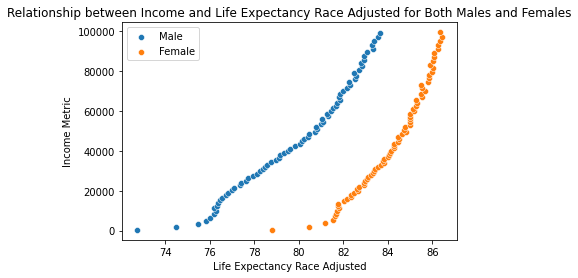

In [60]:
# This is to plot out the relationship between the Life Expectancy Race Adjusted and Income, where the 
# datapoints are separated into just Males and Females
sns.scatterplot(x = data0_male_no_outliers['le_raceadj'], y = data0_male_no_outliers['hh_inc'], label='Male')
sns.scatterplot(x = data0_female_no_outliers['le_raceadj'], y = data0_female_no_outliers['hh_inc'], label='Female')

plt.title('Relationship between Income and Life Expectancy Race Adjusted for Both Males and Females')
plt.xlabel('Life Expectancy Race Adjusted')
plt.ylabel('Income Metric')
plt.show()

In [61]:
# Set the respective dataq1_m and dataq1_f dataframes
datarq1_m = data0_male_no_outliers[['hh_inc','le_raceadj']]
datarq1_f = data0_female_no_outliers[['hh_inc','le_raceadj']]

In [62]:
# Standardize the dataframes 
datarq1_m['hh_inc_st'] = (datarq1_m['hh_inc'] - datarq1_m['hh_inc'].mean()) / datarq1_m['hh_inc'].std()
datarq1_m['le_raceadj_st'] = (datarq1_m['le_raceadj'] - datarq1_m['le_raceadj'].mean()) / datarq1_m['le_raceadj'].std()

datarq1_f['hh_inc_st'] = (datarq1_f['hh_inc'] - datarq1_f['hh_inc'].mean()) / datarq1_f['hh_inc'].std()
datarq1_f['le_raceadj_st'] = (datarq1_f['le_raceadj'] - datarq1_f['le_raceadj'].mean()) / datarq1_f['le_raceadj'].std()

datarq1_f.head()


,hh_inc,le_raceadj,hh_inc_st,le_raceadj_st
0,432.782043,78.783836,-1.658416,-3.192372
1,1919.115723,80.462410,-1.603440,-2.176903
2,3718.215576,81.168098,-1.536897,-1.749990
3,5466.638672,81.530678,-1.472228,-1.530644
4,7089.428711,81.628853,-1.412206,-1.471252


**Modeling (Q1) ✅**

RQ1: LE(agg) ~ Inc(agg)

As a product of our EDA, we noticed that there were two distinct lines for the scatterplot between income and life expectancy, separated by gender. This is clearly described in the EDA section of our paper. From this, we arrived at the conclusion to remove outliers from our model so as not to skew the Ridge model that we chose to run. Although, we agreed as a group that there would be many confounders, we thought it would be interesting to see if there was an impact of being a male or a female on the life expectancy. In Econometrics, we would have likely included an interaction terms as part of our regression to study the effect of the treatment on the outcome on one group(M) versus the other(F). However, we wanted to keep the problem simple.  
Before running the regression of income on life expectancy, we thought we should complete some data cleaning and formatting to ensure that the difference of X on Y between the groups were as sizable as possible which is why we created the new dataframe with standardized data. Initially, we didn’t see much of an impact of our X on the Y variable, however, after using the log operation on the coefficients, the change was more easily identifiable between the genders when we ran the Simple Linear Model as the first prediction model (M = log: -0.0092, F = log: -0.0181). The coefficients on income were significantly different between males and females (2.513 for males and 1.574 for females). Further, we realize that this coefficient is significant due to the high R^2 values for both prediction models. 

In [63]:
# Apply linear regression to the males dataframe
X = datarq1_m[['hh_inc_st']]
y = datarq1_m[['le_raceadj_st']].astype(float)
model = LinearRegression()
model.fit(X, y)
coefficient = model.coef_[0]
print(coefficient, 'log:',math.log10(coefficient))


[0.97893187] log: -0.009247533443360082


In [64]:
# Apply linear regression to the females dataframe
X = datarq1_f[['hh_inc_st']]
y = datarq1_f[['le_raceadj_st']].astype(float)
model = LinearRegression()
model.fit(X, y)
coefficient = model.coef_[0]
print(coefficient, 'log:', math.log10(coefficient))


[0.95900395] log: -0.018179603867830442


In [65]:
# The relationship between income and life expectancy is stronger for females in comparison to males 
# This may be due to reasons such as XYZ

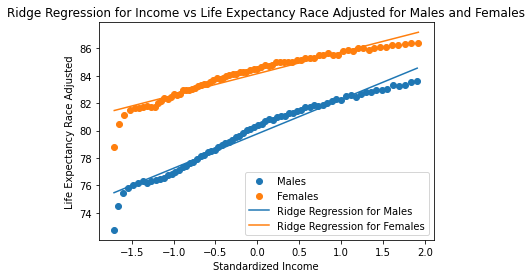

Coefficients for males: [[2.51348285]]
Coefficients for females: [[1.57449818]]
Rsquared values for males: 0.9581277727911381
Rsquared values for females: 0.9195206240511522


In [66]:
# Apply Ridge regression to both the males and females dataframe
X_m = datarq1_m[['hh_inc']]
y_m = datarq1_m[['le_raceadj']]
X_f = datarq1_f[['hh_inc']]
y_f = datarq1_f[['le_raceadj']]

scaler = StandardScaler()
X_m = scaler.fit_transform(X_m)
X_f = scaler.transform(X_f)

ridge_m = Ridge(alpha=1)
ridge_m.fit(X_m, y_m)
ridge_f = Ridge(alpha=1)
ridge_f.fit(X_f, y_f)

fig, ax = plt.subplots()
ax.scatter(X_m, y_m, label='Males')
ax.scatter(X_f, y_f, label='Females')
ax.plot(X_m, ridge_m.predict(X_m), label='Ridge Regression for Males')
ax.plot(X_f, ridge_f.predict(X_f), label='Ridge Regression for Females')
plt.xlabel('Standardized Income')
plt.ylabel('Life Expectancy Race Adjusted')
plt.title('Ridge Regression for Income vs Life Expectancy Race Adjusted for Males and Females')
ax.legend()
plt.show()

r2_m = r2_score(y_m, ridge_m.predict(X_m))
r2_f = r2_score(y_f, ridge_f.predict(X_f))

print('Coefficients for males:', ridge_m.coef_)
print('Coefficients for females:', ridge_f.coef_)
print('Rsquared values for males:', r2_m)
print('Rsquared values for females:', r2_f)

**Data Cleaning (Q2) ✅**

We used table 9: Commuting Zone Characteristics, and table 10: Commuting Zone Life Expectancy Estimates by Year, Gender, and Income Quartile. 
Loaded the two data table onto the notebook as data1 (table 9) and data2 (table 10)
Dropped the columns in the data1 and data2 dataframes that are not needed for the analysis. 
Filtered the data for a specific year (2001) from data1, as this was the nearest available year for the relevant variable.
Grouped each respective dataframe by state and take the average of the values for each state. This only includes information for 40 states.
Merged the dataframes on the “stateabbrv” column as comb_df.
Dropped the “year” column as it is no longer needed.
Computed the mean of the life expectancy by quartiles for each gender, and created a new column for each quartile representing the average for both genders.
Dropped the columns that represent individual gender data. Since the analysis is only interested in examining the relationship between income and life expectancy, the gender-specific columns are not needed.

In [67]:
# This is to filter out dataframe data1_le to only contain the columns we want
data1_le = data1[['czname', 'stateabbrv', 'year', 'le_raceadj_q1_F', 'le_raceadj_q2_F', 'le_raceadj_q3_F', 'le_raceadj_q4_F',
                 'le_raceadj_q1_M', 'le_raceadj_q2_M', 'le_raceadj_q3_M', 'le_raceadj_q4_M']]
data1_le

,czname,stateabbrv,year,le_raceadj_q1_F,le_raceadj_q2_F,le_raceadj_q3_F,le_raceadj_q4_F,le_raceadj_q1_M,le_raceadj_q2_M,le_raceadj_q3_M,le_raceadj_q4_M
0,Knoxville,TN,2001,83.366356,88.776009,87.703346,87.717552,76.582520,77.192322,85.928513,84.144646
1,Knoxville,TN,2002,81.593407,83.572144,85.613884,87.435120,77.319992,80.360619,83.056007,88.502289
2,Knoxville,TN,2003,82.106239,84.895683,87.292442,89.165634,76.784004,82.710892,81.412766,87.516769
3,Knoxville,TN,2004,84.422203,84.887505,80.451912,89.432823,75.073013,80.589066,85.108208,88.922928
4,Knoxville,TN,2005,83.746376,86.020317,91.461639,89.508858,75.952019,76.819023,85.429420,88.739761
...,...,...,...,...,...,...,...,...,...,...,...
1395,Seattle,WA,2010,84.939133,85.371666,88.784935,90.672325,76.531929,81.362808,83.631439,86.186546
1396,Seattle,WA,2011,83.735802,85.450081,86.866592,89.782555,77.322296,80.054924,84.883949,87.690872
1397,Seattle,WA,2012,82.484291,85.087288,87.442810,88.849556,77.563934,80.648026,85.057281,86.722679
1398,Seattle,WA,2013,83.834938,85.878883,88.974625,87.933914,78.159195,82.887321,82.974548,85.581596


In [68]:
# Select all the rows and the first 18 columns because that's what we are interested in
data2_vars = data2.iloc[:, 0:18]

# Filter the dataframe data2_vars to only contain columns we are interested in
data2_vars = data2_vars.drop(columns= ['cz', 'czname', 'pop2000', 'fips', 'statename'])

# Add a hhinc00 column into the dataframe data2_vars
data2_vars['hhinc00'] = data2['hhinc00']

data2_vars['stateabbrv'].unique()

array(['TN', 'NC', 'VA', 'SC', 'MS', 'LA', 'AR', 'KY', 'AL', 'GA', 'FL',
       'WV', 'MD', 'DC', 'MI', 'OH', 'IN', 'IL', 'PA', 'NY', 'NJ', 'DE',
       'ME', 'VT', 'RI', 'MA', 'NH', 'CT', 'WI', 'MN', 'IA', 'MO', 'ND',
       'SD', 'MT', 'NE', 'WY', 'CO', 'KS', 'OK', 'TX', 'NM', 'AK', 'ID',
       'HI', 'AZ', 'OR', 'UT', 'CA', 'NV', 'WA'], dtype=object)

In [69]:
# We filtered only the data for 2001 as this was the closest year for the variable 
# data that we are using as part of our SLR 
data1_le_2001 = data1_le[data1_le['year'] == 2001]
data1_le_2001['stateabbrv'].unique()

array(['TN', 'NC', 'VA', 'LA', 'AR', 'FL', 'SC', 'GA', 'AL', 'MD', 'DC',
       'MI', 'OH', 'KY', 'IN', 'PA', 'NY', 'NJ', 'ME', 'RI', 'MA', 'NH',
       'CT', 'MN', 'WI', 'IL', 'MO', 'IA', 'NE', 'CO', 'OK', 'TX', 'HI',
       'NM', 'AZ', 'UT', 'CA', 'NV', 'WA', 'OR'], dtype=object)

In [70]:
# Group each respective dataframe data2_vars and data1_le_2001 by states and average the values
data2_state = data2_vars.groupby('stateabbrv').mean().reset_index()
data1_state = data1_le_2001.groupby('stateabbrv').mean().reset_index()

In [71]:
# Combine the dataframes data1_state and data2_state on stateabbrv
# There are only 40 states as the LE data only has 40 states 
comb_df = data1_state.merge(data2_state, on='stateabbrv')
comb_df = comb_df.drop(columns = ['year'])
comb_df

,stateabbrv,le_raceadj_q1_F,le_raceadj_q2_F,le_raceadj_q3_F,le_raceadj_q4_F,le_raceadj_q1_M,le_raceadj_q2_M,le_raceadj_q3_M,le_raceadj_q4_M,cur_smoke_q1,...,cur_smoke_q4,bmi_obese_q1,bmi_obese_q2,bmi_obese_q3,bmi_obese_q4,exercise_any_q1,exercise_any_q2,exercise_any_q3,exercise_any_q4,hhinc00
0,AL,82.637535,83.939602,85.483063,89.377693,76.794773,80.667187,84.396439,85.148846,0.274852,...,0.136086,0.343524,0.297409,0.299692,0.237569,0.558603,0.697388,0.771387,0.803192,31129.476423
1,AR,81.315262,88.524788,79.715363,87.599548,74.310631,78.211037,77.051125,82.962059,0.297243,...,0.134702,0.327843,0.293675,0.274231,0.269378,0.549968,0.709567,0.766469,0.801208,30028.298503
2,AZ,81.486862,84.548580,82.830654,85.234226,76.879391,78.964035,83.933132,86.735504,0.222548,...,0.107992,0.270925,0.211336,0.225599,0.180860,0.642178,0.754535,0.842029,0.872434,31142.563672
3,CA,82.208791,82.281725,83.479632,86.048318,78.236293,79.033129,82.591752,85.764182,0.203586,...,0.089893,0.254359,0.243856,0.249101,0.210742,0.677671,0.770380,0.847974,0.878829,36383.474067
4,CO,83.665939,86.380867,85.692833,87.781029,78.382523,83.698654,83.852837,86.899368,0.254811,...,0.086651,0.198208,0.196943,0.185147,0.173545,0.701722,0.796521,0.876639,0.885378,34488.711627
5,CT,80.998627,81.945854,84.140968,87.521263,77.217979,80.864365,82.060104,86.905457,0.256293,...,0.115079,0.261037,0.216085,0.195146,0.157310,0.604491,0.737713,0.810432,0.881832,53281.222656
6,DC,82.091583,82.963478,85.887672,87.626099,75.248077,77.450142,81.554512,84.839165,0.258532,...,0.109360,0.296150,0.226814,0.205064,0.162077,0.619437,0.746453,0.832790,0.884044,53705.695312
7,FL,83.994999,85.399677,86.465897,89.497492,78.139297,81.120404,82.363840,84.328946,0.274034,...,0.147035,0.278220,0.241117,0.240095,0.199873,0.600968,0.740656,0.813264,0.864047,39463.783447
8,GA,83.301422,84.428322,82.882187,87.395134,76.773964,78.287827,83.938599,83.474297,0.262231,...,0.119609,0.339328,0.276143,0.302675,0.258915,0.573036,0.713961,0.760682,0.867590,30621.947405
9,HI,76.918327,81.954826,80.195656,84.782501,77.613403,79.553078,81.477493,85.559692,0.241317,...,0.108510,0.204644,0.191320,0.181293,0.166971,0.744947,0.809309,0.845911,0.891328,38044.737305


In [72]:
# Find the q1, q2, q3, q4 Life Expectancy Race Adjusted values
comb_df["le_raceadj_q1"] = (comb_df["le_raceadj_q1_M"] + comb_df["le_raceadj_q1_F"]) / 2
comb_df["le_raceadj_q2"] = (comb_df["le_raceadj_q2_M"] + comb_df["le_raceadj_q2_F"]) / 2
comb_df["le_raceadj_q3"] = (comb_df["le_raceadj_q3_M"] + comb_df["le_raceadj_q3_F"]) / 2
comb_df["le_raceadj_q4"] = (comb_df["le_raceadj_q4_M"]  + comb_df["le_raceadj_q4_F"]) / 2
comb_df

,stateabbrv,le_raceadj_q1_F,le_raceadj_q2_F,le_raceadj_q3_F,le_raceadj_q4_F,le_raceadj_q1_M,le_raceadj_q2_M,le_raceadj_q3_M,le_raceadj_q4_M,cur_smoke_q1,...,bmi_obese_q4,exercise_any_q1,exercise_any_q2,exercise_any_q3,exercise_any_q4,hhinc00,le_raceadj_q1,le_raceadj_q2,le_raceadj_q3,le_raceadj_q4
0,AL,82.637535,83.939602,85.483063,89.377693,76.794773,80.667187,84.396439,85.148846,0.274852,...,0.237569,0.558603,0.697388,0.771387,0.803192,31129.476423,79.716154,82.303394,84.939751,87.263269
1,AR,81.315262,88.524788,79.715363,87.599548,74.310631,78.211037,77.051125,82.962059,0.297243,...,0.269378,0.549968,0.709567,0.766469,0.801208,30028.298503,77.812946,83.367912,78.383244,85.280804
2,AZ,81.486862,84.548580,82.830654,85.234226,76.879391,78.964035,83.933132,86.735504,0.222548,...,0.180860,0.642178,0.754535,0.842029,0.872434,31142.563672,79.183126,81.756308,83.381893,85.984865
3,CA,82.208791,82.281725,83.479632,86.048318,78.236293,79.033129,82.591752,85.764182,0.203586,...,0.210742,0.677671,0.770380,0.847974,0.878829,36383.474067,80.222542,80.657427,83.035692,85.906250
4,CO,83.665939,86.380867,85.692833,87.781029,78.382523,83.698654,83.852837,86.899368,0.254811,...,0.173545,0.701722,0.796521,0.876639,0.885378,34488.711627,81.024231,85.039761,84.772835,87.340199
5,CT,80.998627,81.945854,84.140968,87.521263,77.217979,80.864365,82.060104,86.905457,0.256293,...,0.157310,0.604491,0.737713,0.810432,0.881832,53281.222656,79.108303,81.405109,83.100536,87.213360
6,DC,82.091583,82.963478,85.887672,87.626099,75.248077,77.450142,81.554512,84.839165,0.258532,...,0.162077,0.619437,0.746453,0.832790,0.884044,53705.695312,78.669830,80.206810,83.721092,86.232632
7,FL,83.994999,85.399677,86.465897,89.497492,78.139297,81.120404,82.363840,84.328946,0.274034,...,0.199873,0.600968,0.740656,0.813264,0.864047,39463.783447,81.067148,83.260040,84.414868,86.913219
8,GA,83.301422,84.428322,82.882187,87.395134,76.773964,78.287827,83.938599,83.474297,0.262231,...,0.258915,0.573036,0.713961,0.760682,0.867590,30621.947405,80.037693,81.358074,83.410393,85.434715
9,HI,76.918327,81.954826,80.195656,84.782501,77.613403,79.553078,81.477493,85.559692,0.241317,...,0.166971,0.744947,0.809309,0.845911,0.891328,38044.737305,77.265865,80.753952,80.836575,85.171097


In [73]:
# We start with the prediction model for the first question which is: what is the relationship between income and life expectancy
# Therefore, we drop all of the columns that separate gender as the other variables in our df are separated solely by quartile and not by gender 
comb_df_q1 = comb_df.drop(columns=['le_raceadj_q1_M', 'le_raceadj_q2_M', 'le_raceadj_q3_M', 'le_raceadj_q4_M', 'le_raceadj_q1_F', 'le_raceadj_q2_F', 'le_raceadj_q3_F', 'le_raceadj_q4_F'])
# comb_df_q1 = comb_df_q1.assign(inc_q1='active')
comb_df_q1

,stateabbrv,cur_smoke_q1,cur_smoke_q2,cur_smoke_q3,cur_smoke_q4,bmi_obese_q1,bmi_obese_q2,bmi_obese_q3,bmi_obese_q4,exercise_any_q1,exercise_any_q2,exercise_any_q3,exercise_any_q4,hhinc00,le_raceadj_q1,le_raceadj_q2,le_raceadj_q3,le_raceadj_q4
0,AL,0.274852,0.231065,0.158915,0.136086,0.343524,0.297409,0.299692,0.237569,0.558603,0.697388,0.771387,0.803192,31129.476423,79.716154,82.303394,84.939751,87.263269
1,AR,0.297243,0.228844,0.179571,0.134702,0.327843,0.293675,0.274231,0.269378,0.549968,0.709567,0.766469,0.801208,30028.298503,77.812946,83.367912,78.383244,85.280804
2,AZ,0.222548,0.182424,0.142151,0.107992,0.270925,0.211336,0.225599,0.180860,0.642178,0.754535,0.842029,0.872434,31142.563672,79.183126,81.756308,83.381893,85.984865
3,CA,0.203586,0.156147,0.121090,0.089893,0.254359,0.243856,0.249101,0.210742,0.677671,0.770380,0.847974,0.878829,36383.474067,80.222542,80.657427,83.035692,85.906250
4,CO,0.254811,0.230716,0.143139,0.086651,0.198208,0.196943,0.185147,0.173545,0.701722,0.796521,0.876639,0.885378,34488.711627,81.024231,85.039761,84.772835,87.340199
5,CT,0.256293,0.230258,0.179953,0.115079,0.261037,0.216085,0.195146,0.157310,0.604491,0.737713,0.810432,0.881832,53281.222656,79.108303,81.405109,83.100536,87.213360
6,DC,0.258532,0.206106,0.168679,0.109360,0.296150,0.226814,0.205064,0.162077,0.619437,0.746453,0.832790,0.884044,53705.695312,78.669830,80.206810,83.721092,86.232632
7,FL,0.274034,0.226508,0.189531,0.147035,0.278220,0.241117,0.240095,0.199873,0.600968,0.740656,0.813264,0.864047,39463.783447,81.067148,83.260040,84.414868,86.913219
8,GA,0.262231,0.217103,0.192614,0.119609,0.339328,0.276143,0.302675,0.258915,0.573036,0.713961,0.760682,0.867590,30621.947405,80.037693,81.358074,83.410393,85.434715
9,HI,0.241317,0.196712,0.155504,0.108510,0.204644,0.191320,0.181293,0.166971,0.744947,0.809309,0.845911,0.891328,38044.737305,77.265865,80.753952,80.836575,85.171097


**EDA (Q2) ✅**

We decided to use a heat map to explore the relationship between health variables, household income, and life expectancy (all the variables other than household income are divided into four groups by income quartile). Here are some of the observations: 
Overall, we observed a negative correlation between smoking and life expectancy, which means that as the fraction of current smokers increases, life expectancy decreases. We noticed a higher negative correlation in the 1st and 4th quartile.  It is understandable for the 1st income quartile to have a higher negative correlation between smoking and life expectancy, as poorer individuals have less access to healthcare and lead less healthy lifestyles. Therefore, the negative effects of smoking on their health may be more pronounced, leading to a higher correlation with reduced life expectancy. The result for the 4th quartile could be due to data error, or a potential reason can be individuals in the 4th income quartile may have more access to healthcare and resources to address their health issues, leading to the negative health impacts of smoking being more pronounced in this group, resulting in a stronger correlation between smoking and reduced life expectancy.
We see a positive correlation between smoking and obesity in the 1st, 2nd, 3rd, and 4th. This means that as the fraction of current smokers increases, the fraction of people who are obese also increases. The correlation is strong for individuals in the 4th quartile  which may be due to the fact that individuals in this group have more access to healthcare and resources to address their health issues. As a result, the negative health impacts of smoking may be more pronounced in this group, leading to a stronger correlation between smoking and obesity. 
When looking at the impact of health variables on income, there was a interesting trend which is – negative correlation between household income and life expectancy for those in the 3rd and 4th quartile.

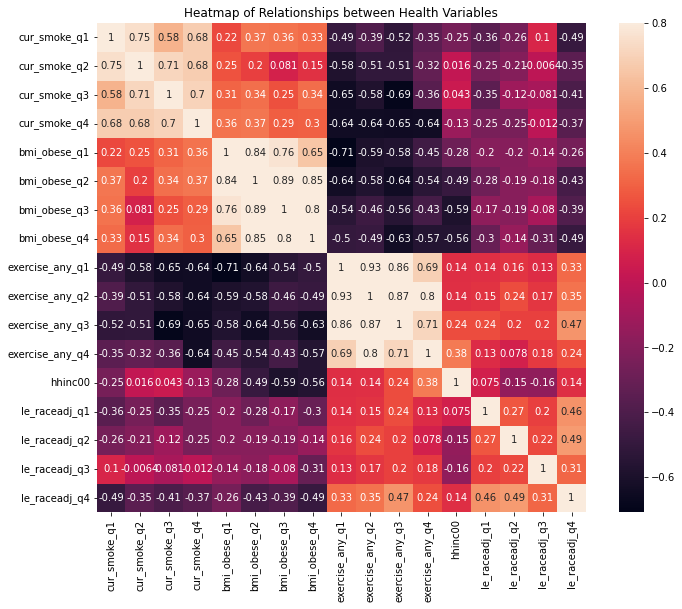

In [74]:
# Plot a heatmap for q1
corrmat_m_2000 = comb_df_q1.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat_m_2000, vmax=.8, annot=True, square=True);
plt.title('Heatmap of Relationships between Health Variables')
plt.show()

**Modeling (Q2) ✅**

RQ2: LE(agg) ~ income(agg) + smoke + bmi + exercise 

After realizing that there were a lot of confounding variables in our initial univariate regressions. We divided to include a variety of health factors that we intuitively believed would have a great impact on the life expectancy. This Research Question led us to investigate and create separate models for Q1 and Q4 and we wanted to investigate the impact of different health factors on the wealthiest and the poorest invidiuals in society. These variables in cluded proportion of indivbiduals with an obese BMI, proportion of smokers in the sample as we ll as percentage of individuals that lead an active lifestyle based on if they exercised at regular intervals. The data had to be put through cleaniung so that we aggregated it at the state level. After aggregating the data at the state level we wanted to investigate the correlation between the health ffactors and found trhat certain variables had a higher correlation than others and so that we should seek to include them in our final model that we ran. One example of this is that the levels of obese BMI was highly correlated with the variable for individuals that did not exercise. 
For our first model we ran a Simple Linear Regression for which we observed that for both quartiles of individuals, the further the life expectancy from the median life expectance, the harder it was for our model to predict it accurately thus larger absolute values of the residuals. Next we decided to run a KNN model for both quartiles to investigate whether our model could predict the life expectance of wealthier opr poorer individuals better and we saw a much higher prediction based on the fiven variables for the weatlehr individuals (Q1=0.38, Q4=0.88).  However, we say that the Mean Squared Error for the weatlehrier group was slightly higher(Q1=1.96, Q4=2.46)

**Linear Model for Q1 Life Expectancy**

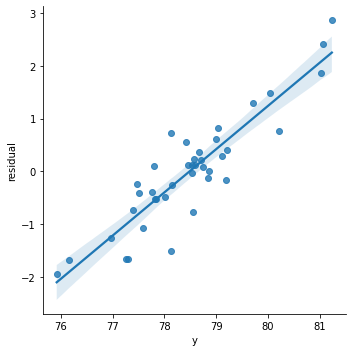

In [75]:
# Apply linear model to the q1 dataframe for life expectancy
X = comb_df_q1[['hhinc00', 'cur_smoke_q1', 'bmi_obese_q1', 'exercise_any_q1']]
y = comb_df_q1['le_raceadj_q1'].astype(float)
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
residual = (y - y_pred).astype(float)
df = pd.DataFrame({'y': y,
             'residual': residual})
sns.lmplot(x = 'y' , y = 'residual', data = df)

**Linear Model for Q4 Life Expectancy**

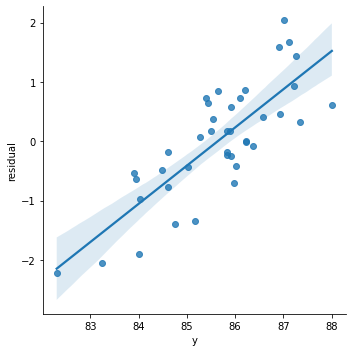

In [76]:
# Apply linear model to the q4 dataframe for life expectancy
X = comb_df_q1[['hhinc00', 'cur_smoke_q4', 'bmi_obese_q4', 'exercise_any_q4']]
y = comb_df_q1['le_raceadj_q4'].astype(float)
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
residual = (y - y_pred).astype(float)
df = pd.DataFrame({'y': y,
             'residual': residual})
sns.lmplot(x = 'y' , y = 'residual', data = df)

**KNN and MSE for Life Expectancy Q1**

In [77]:
# Apply KNN classification and MSE to the q1 dataframe for life expectancy
X = comb_df_q1[['cur_smoke_q1', 'bmi_obese_q1', 'exercise_any_q1', 'hhinc00']]
y = comb_df_q1['le_raceadj_q1']

y = np.where(y >= y.median(), 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.38


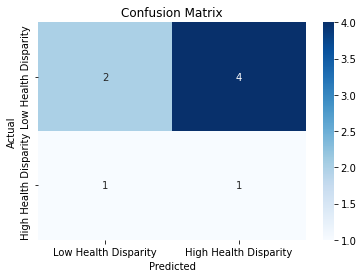

/var/folders/nb/j100lh6j2tq2x6sx1mwhk8jh0000gn/T/ipykernel_54457/488847898.py:10: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='x', alpha=0.5, edgecolors='k', label='Actual')


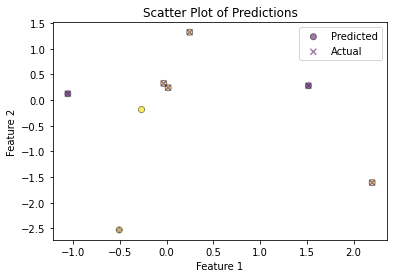

In [78]:
# Make confusion matrix to the q1 dataframe for life expectancy
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Low Health Disparity', 'High Health Disparity'], yticklabels=['Low Health Disparity', 'High Health Disparity'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', marker='o', alpha=0.5, edgecolors='k', label='Predicted')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='x', alpha=0.5, edgecolors='k', label='Actual')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Predictions')
plt.legend()
plt.show()

Mean Squared Error: 1.96


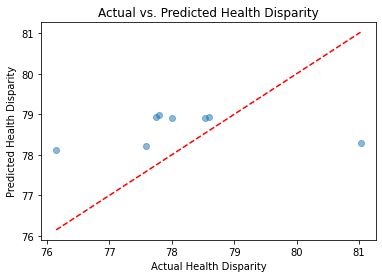

In [79]:
# Apply KNN classification and MSE to the q1 dataframe for life expectancy
X = comb_df_q1[['cur_smoke_q1', 'bmi_obese_q1', 'exercise_any_q1', 'hhinc00']]
y = comb_df_q1['le_raceadj_q1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsRegressor(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Health Disparity')
plt.ylabel('Predicted Health Disparity')
plt.title('Actual vs. Predicted Health Disparity')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

**KNN and MSE for Life Expectancy Q4**

In [80]:
# Apply KNN classification and MSE to the q4 dataframe for life expectancy
X = comb_df_q1[['cur_smoke_q4', 'bmi_obese_q4', 'exercise_any_q4', 'hhinc00']]
y = comb_df_q1['le_raceadj_q4']  

y = np.where(y >= y.median(), 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.88


Mean Squared Error: 2.46


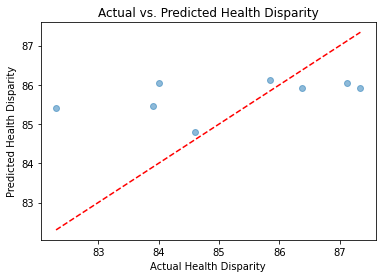

In [81]:
# Apply KNN classification and MSE to the q4 dataframe for life expectancy
X = comb_df_q1[['cur_smoke_q4', 'bmi_obese_q4', 'exercise_any_q4', 'hhinc00']]
y = comb_df_q1['le_raceadj_q4']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsRegressor(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Health Disparity')
plt.ylabel('Predicted Health Disparity')
plt.title('Actual vs. Predicted Health Disparity')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

**Interpretation and Conclusion ✅**

Higher income has been associated with greater longevity, however the gap in life expectancy across income groups has increased. In order to understand and address this issue, we have come up with two research questions: what effect does income have on life expectancy for males and females and how does life expectancy differ between the top 25% and bottom 25%.

We begin with a Simple Linear Model where the results were -0.0092 for male and -0.0181 for female. This suggests the relationship between income and life expectancy is different for male and females, with income having a stronger impact on life expectancy for males than females. This difference in the coefficient may be due to factors such as differences in occupations, education, health style, ect. To get a more in-depth analysis, we ran a Ridge regression to explore the relation a bit further. Based on the analysis, we found a significant difference in the impact of income on life expectancy between males and females. The coefficients for income were 2.513 for males and 1.574 for females, which findings from the linear model -  impact of income on life expectancy is much greater for males than females. It is also supported by the high R^2 values for both prediction models, indicating that income is a strong predictor of life expectancy for both genders, but even more so for males. Ultimately, These findings suggest that policies aimed at improving income equality may have a greater impact on life expectancy for males compared to females. Further research is needed to explore the underlying reasons for these gender differences and to identify effective interventions to address them. 

To further analyze the relationship between life expectancy and income, we conducted two linear regressions to determine how the correlation between life expectancy and health variables (fraction of current smoker, fraction of obese, and fraction of exercise in the past 30 days) and household income differs between the bottom 25% (1st quartile) and top 25% of income (4th quartile). Our results indicate that there is a stronger correlation between the health variables and life expectancy for individuals in the 1st quartile as compared to the 4th quartile.  This is supported by the fact that the data points in the 1st income quartile regression are much closer to the regression line than those in the regression for 4th income quartile. This signifies the impact of health variables on life expectancy is more pronounced among individuals with lower incomes. This finding could have important implications for decision makers who are looking to improve health outcomes for people with lower incomes. Furthermore, we decide to use the KNN model for both quartiles to investigate the possibility of using our model to predict the life expectancy of wealthier and poorer individuals. The model showed higher prediction accuracy for the wealthiest individuals, with a prediction score of 0.88, compared to a prediction score of 0.38 for the poorest individuals. Despite the higher accuracy, the model still had slightly higher mean squared error for the healthiest group compared to the poorest which indicates that the model is less accurate. 

Based on our findings, decision makers should consider implementing policies aimed at improving income equality and addressing the underlying factors contributing to the gender differences in the impact of income on life expectancy. For example, increase access to education, implement policies to address discrimination, encourage gender equality through education and employment to reduce wage gap, and expand health care access. We should also prioritize policies that increase income and reduce smoking rates, particularly among lower-income individuals. This could include expanding access to healthcare and maternal care services, implementing anti-smoking campaigns, and providing resources for healthy lifestyle choices. By allocating resources in these areas, decision makers could potentially improve life expectancy and reduce health disparities across income levels.
Although our analysis provides insights on the relationship between income, health variables, and life expectancy, there are several caveats that should be considered. For example, our data is limited to specific regions and time periods, and may not be applicable to other regions and time. Our model also relies on a number of assumptions and specifications, which may limit the accuracy and predictive power. The data that we use are pulled from other papers and are observational; thus, it cannot establish causality. 

Overall, our analysis highlights the complex relationship between income, health variables, and life expectancy. Our findings underscore the importance of addressing both economic and health-related factors to improve health outcomes for individuals across all income levels. By focusing on targeted interventions to improve income and health outcomes, decision makers could potentially improve quality of life and reduce healthcare costs in the long run.